In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [58]:
#import the data 
data = pd.read_csv("scores.txt", sep=',',names=["score1","score2","pass"])

In [59]:
#test the import 
#data.head()
print(data.shape)
data.describe()

(200, 3)


,score1,score2,pass
count,200.000000,200.000000,200.000000
mean,49.065000,50.190000,0.275000
std,28.433662,28.392509,0.447635
min,0.000000,0.000000,0.000000
25%,24.000000,26.750000,0.000000
50%,49.500000,47.000000,0.000000
75%,75.000000,74.000000,1.000000
max,99.000000,99.000000,1.000000


In [60]:
trainX = np.array(data.iloc[:,:2])
trainY = np.array(data["pass"])

In [61]:
#validate array shaped correctly
print(trainX.shape)
print(trainY.shape)

(200, 2)
(200,)


In [62]:
#create it 
LogReg = LogisticRegression()

In [63]:
#documentation on flags etc on 
#https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression


In [64]:
#train it on the training data
LogReg.fit(trainX,trainY)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [65]:
#Testing against seperate file 
testing = pd.read_csv("test.txt", sep=',',names=["score1","score2","pass"])
testingX = np.array(testing.iloc[:,:2])
testingY = np.array(testing["pass"])

In [66]:
#test it on the testing data and print accuracy
prediction = LogReg.predict(testingX)
print(accuracy_score(testingY,prediction))

0.9


In [67]:
#create dataframe to see prediction vs actual results
output = testing
output['prediction'] = prediction

In [68]:
print(output)

    score1  score2  pass  prediction
0       28       3     0           0
1        5      42     0           0
2       35      45     0           0
3       66      26     0           0
4       15      76     0           0
5       66      89     1           1
6        4      87     0           0
7       70      83     1           1
8       13      51     0           0
9       34      62     0           0
10      17      25     0           0
11      51      23     0           0
12      67      37     0           0
13      24      63     0           0
14      83      28     0           0
15      75       5     0           0
16      21       9     0           0
17      82      66     1           1
18       9      94     0           0
19      96      27     1           0
20      34      41     0           0
21      42      79     1           0
22      75      43     0           0
23      99      99     1           1
24      12      46     0           0
25      81      19     0           0
2

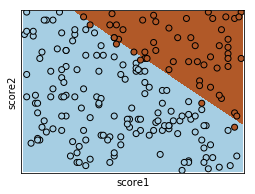

In [72]:
#FROM Logistical Regression 
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = trainX[:, 0].min() - .5, trainX[:, 0].max() + .5
y_min, y_max = trainX[:, 1].min() - .5, trainX[:, 1].max() + .5
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = LogReg.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(trainX[:, 0], trainX[:, 1], c=trainY, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('score1')
plt.ylabel('score2')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()